In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [31]:
url = "pakwheels.csv"
df = pd.read_csv(url)


In [4]:
df.head()

,addref,city,assembly,body,make,model,year,engine,transmission,fuel,color,registered,mileage,price
0,7943732,Peshawar,NaN,Sedan,Toyota,Corolla,2013.0,1300.0,Manual,Petrol,Silver Metallic,Lahore,145000,2870000.0
1,7730314,Lahore,NaN,Sedan,Honda,City,2000.0,1300.0,Manual,Petrol,Blue,Lahore,230000,995000.0
2,7943737,Lahore,NaN,Sedan,Toyota,Yaris,2021.0,1300.0,Manual,Petrol,Super White,Punjab,60500,3585000.0
3,7943733,Lahore,NaN,Hatchback,Suzuki,Swift,2017.0,1300.0,Manual,Petrol,Grey,Islamabad,87000,2250000.0
4,7923484,Lahore,NaN,Sedan,Honda,Civic,2017.0,1800.0,Automatic,Petrol,Grey,Lahore,86000,4850000.0


In [5]:
df.describe()

,addref,year,engine,mileage,price
count,7.787800e+04,73099.000000,77875.000000,77878.000000,7.729500e+04
mean,7.809878e+06,2012.812610,1408.072550,91109.192750,3.883232e+06
std,2.599523e+05,7.516685,704.459947,89275.336173,5.759480e+06
min,2.748970e+05,1990.000000,3.000000,1.000000,1.100000e+05
25%,7.805760e+06,2007.000000,1000.000000,34000.000000,1.450000e+06
50%,7.865805e+06,2015.000000,1300.000000,80000.000000,2.700000e+06
75%,7.910334e+06,2019.000000,1600.000000,123456.000000,4.500000e+06
max,7.943741e+06,2022.000000,15000.000000,1000000.000000,5.290000e+08


In [6]:
df.tail(10)

,addref,city,assembly,body,make,model,year,engine,transmission,fuel,color,registered,mileage,price
77868,7772762,Islamabad,Imported,NaN,Suzuki,Every,2012.0,660.0,Automatic,Petrol,Silver,Islamabad,150000,1800000.0
77869,7772759,Multan,NaN,Sedan,Honda,Civic,2019.0,1800.0,Automatic,Petrol,Burgundy,Islamabad,80000,6200000.0
77870,7772771,Lahore,NaN,Compact SUV,MG,ZS,2021.0,1490.0,Automatic,Petrol,White,Un-Registered,27800,5600000.0
77871,7772754,Lahore,Imported,Hatchback,Nissan,Dayz,2013.0,659.0,Automatic,Petrol,NaN,Lahore,90000,2300000.0
77872,7773736,Islamabad,NaN,Hatchback,Suzuki,Wagon,2019.0,1000.0,Manual,Petrol,Silky Silver,Islamabad,42000,2600000.0
77873,7775164,Daska,NaN,Sedan,Honda,Civic,2019.0,1800.0,Automatic,Petrol,Taffeta White,Islamabad,58000,5590000.0
77874,7772775,Abbottabad,Imported,Hatchback,Suzuki,Alto,2015.0,660.0,Automatic,Petrol,Brown,Islamabad,65000,2420000.0
77875,7773716,Faisalabad,Imported,Crossover,MG,HS,2021.0,1490.0,Automatic,Petrol,Arctic White,Un-Registered,5000,7500000.0
77876,7322377,Quetta,NaN,Sedan,Suzuki,Baleno,2005.0,1300.0,Manual,Petrol,Silver,Lahore,19000,1250000.0
77877,7770898,Mandi,Imported,Sedan,Toyota,Corolla,1998.0,1600.0,Automatic,Petrol,Black,Lahore,12345,1150000.0


In [7]:
print(f"rows and columns:{df.shape}")
df.info()

rows and columns:(77878, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77878 entries, 0 to 77877
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   addref        77878 non-null  int64  
 1   city          77878 non-null  object 
 2   assembly      24189 non-null  object 
 3   body          68974 non-null  object 
 4   make          77878 non-null  object 
 5   model         77878 non-null  object 
 6   year          73099 non-null  float64
 7   engine        77875 non-null  float64
 8   transmission  77878 non-null  object 
 9   fuel          76972 non-null  object 
 10  color         76398 non-null  object 
 11  registered    77878 non-null  object 
 12  mileage       77878 non-null  int64  
 13  price         77295 non-null  float64
dtypes: float64(3), int64(2), object(9)
memory usage: 8.3+ MB


In [8]:
df.isnull().sum()

addref              0
city                0
assembly        53689
body             8904
make                0
model               0
year             4779
engine              3
transmission        0
fuel              906
color            1480
registered          0
mileage             0
price             583
dtype: int64

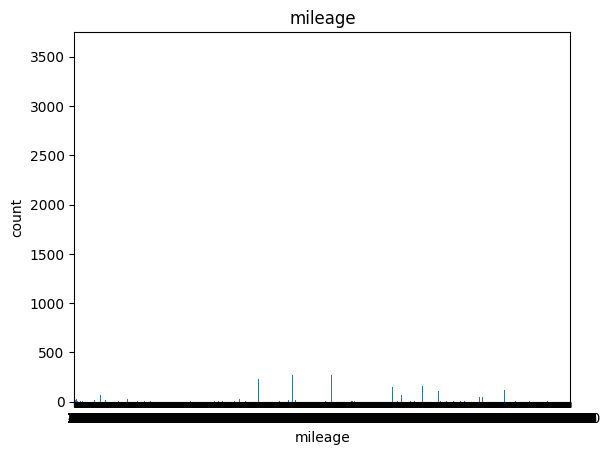

In [7]:
sns.countplot(x='mileage', data=df)
plt.title('mileage')
plt.show()

In [47]:

df = df.dropna(subset=['price'])

df['year'] = df['year'].fillna(df['year'].median())

df = df[['year', 'engine', 'mileage', 'price']].dropna()

In [51]:
df_numeric = df.select_dtypes(include='number')


print(df_numeric.columns)


Index(['year', 'engine', 'mileage', 'price'], dtype='object')


In [48]:

X = df[['year', 'engine', 'mileage']]  
y = df['price']               


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)    


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [50]:
y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))


R2 Score: 0.39666478608065714
